# Data Analytics

Let's start!

In [2]:
import pandas as pd
import seaborn as sns

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/lewagon/data-analytics-sprint/708eeb751a8c259e236c458a90ee90ea27689658/data/AB_NYC_2019.csv')

In [4]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [5]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [6]:
df.drop(['id', 'host_name', 'last_review'], axis='columns', inplace=True)

In [7]:
df.fillna({'reviews_per_month':0}, inplace=True)

In [8]:
df[['name', 'neighbourhood_group', 'price']][5:10]

,name,neighbourhood_group,price
5,Large Cozy 1 BR Apartment In Midtown East,Manhattan,200
6,BlissArtsSpace!,Brooklyn,60
7,Large Furnished Room Near B'way,Manhattan,79
8,Cozy Clean Guest Room - Family Apt,Manhattan,79
9,Cute & Cozy Lower East Side 1 bdrm,Manhattan,150


In [9]:
df[['name', 'neighbourhood_group', 'price']][df['price'] < 100]

,name,neighbourhood_group,price
3,Cozy Entire Floor of Brownstone,Brooklyn,89
4,Entire Apt: Spacious Studio/Loft by central park,Manhattan,80
6,BlissArtsSpace!,Brooklyn,60
7,Large Furnished Room Near B'way,Manhattan,79
8,Cozy Clean Guest Room - Family Apt,Manhattan,79
...,...,...,...
48889,QUIT PRIVATE HOUSE,Queens,65
48890,Charming one bedroom - newly renovated rowhouse,Brooklyn,70
48891,Affordable room in Bushwick/East Williamsburg,Brooklyn,40
48893,43rd St. Time Square-cozy single bed,Manhattan,55


In [10]:
df.nlargest(10, 'number_of_reviews')

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
11759,Room near JFK Queen Bed,47621202,Queens,Jamaica,40.66730,-73.76831,Private room,47,1,629,14.58,2,333
2031,Great Bedroom in Manhattan,4734398,Manhattan,Harlem,40.82085,-73.94025,Private room,49,1,607,7.75,3,293
2030,Beautiful Bedroom in Manhattan,4734398,Manhattan,Harlem,40.82124,-73.93838,Private room,49,1,597,7.72,3,342
2015,Private Bedroom in Manhattan,4734398,Manhattan,Harlem,40.82264,-73.94041,Private room,49,1,594,7.57,3,339
13495,Room Near JFK Twin Beds,47621202,Queens,Jamaica,40.66939,-73.76975,Private room,47,1,576,13.40,2,173
10623,Steps away from Laguardia airport,37312959,Queens,East Elmhurst,40.77006,-73.87683,Private room,46,1,543,11.59,5,163
1879,Manhattan Lux Loft.Like.Love.Lots.Look !,2369681,Manhattan,Lower East Side,40.71921,-73.99116,Private room,99,2,540,6.95,1,179
20403,Cozy Room Family Home LGA Airport NO CLEANING FEE,26432133,Queens,East Elmhurst,40.76335,-73.87007,Private room,48,1,510,16.22,5,341
4870,Private brownstone studio Brooklyn,12949460,Brooklyn,Park Slope,40.67926,-73.97711,Entire home/apt,160,1,488,8.14,1,269
471,LG Private Room/Family Friendly,792159,Brooklyn,Bushwick,40.70283,-73.92131,Private room,60,3,480,6.70,1,0


In [11]:
df['neighbourhood_group'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [12]:
df['neighbourhood_group'].value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

In [13]:
df['neighbourhood'].value_counts().head(10)

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
Hell's Kitchen        1958
East Village          1853
Upper East Side       1798
Crown Heights         1564
Midtown               1545
Name: neighbourhood, dtype: int64

<AxesSubplot:>

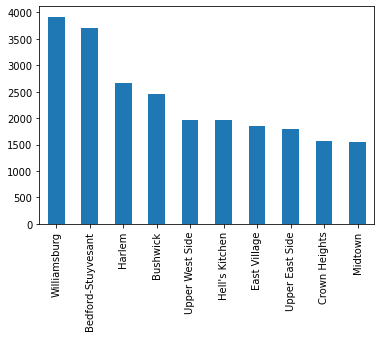

In [14]:
df['neighbourhood'].value_counts().head(10).plot(kind='bar')

<AxesSubplot:xlabel='neighbourhood_group', ylabel='count'>

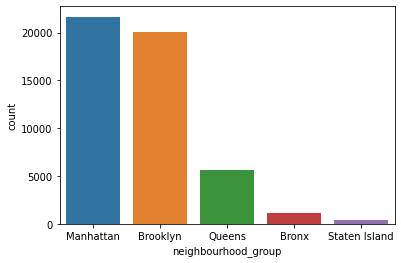

In [15]:
order = df['neighbourhood_group'].value_counts().index
sns.countplot(data=df, x='neighbourhood_group', order = order)

<AxesSubplot:xlabel='neighbourhood_group', ylabel='count'>

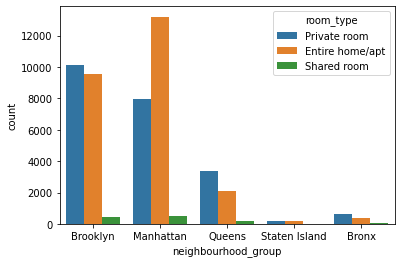

In [16]:
sns.countplot(data=df, x='neighbourhood_group', hue='room_type')

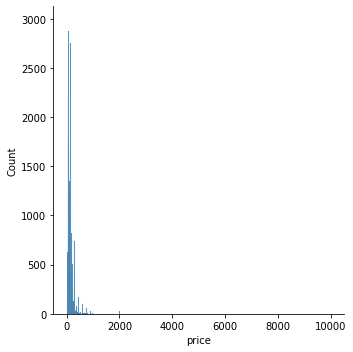

In [18]:
sns.displot(df['price'])

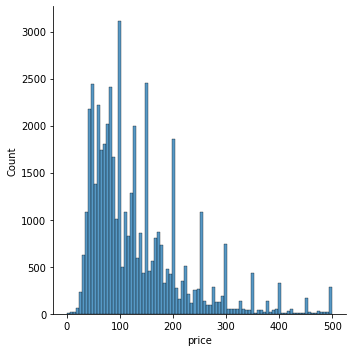

In [19]:
affordable_df = df[df['price'] <= 500]
sns.displot(affordable_df['price'])

In [23]:
original = df.price.mean()
affordable = affordable_df.price.mean()
print(original)
print(affordable)

152.7206871868289
131.53056362458466


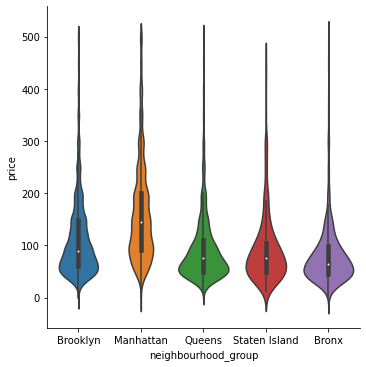

In [24]:
sns.catplot(data=affordable_df, x='neighbourhood_group', y='price', kind='violin')

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

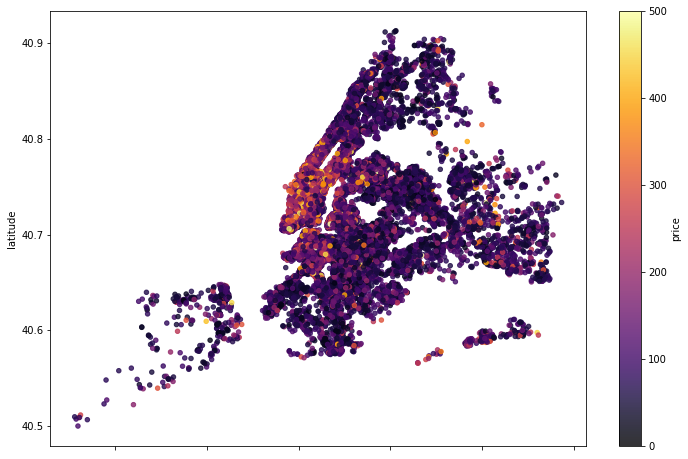

In [25]:
affordable_df.plot(
    kind='scatter',
    x='longitude',
    y='latitude',
    c='price',
    cmap='inferno',
    colorbar=True,
    alpha=0.8,
    figsize=(12,8))